<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Non Linear Regression Analysis</center></h1>


If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies, linear regression presumes that the data is linear. 
Let's learn about non linear regressions and apply an example on python. In this notebook, we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.


<h2 id="importing_libraries">Importing required libraries</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Though Linear regression is very good to solve many problems, it cannot be used for all datasets. First recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y = $2x$ + 3.


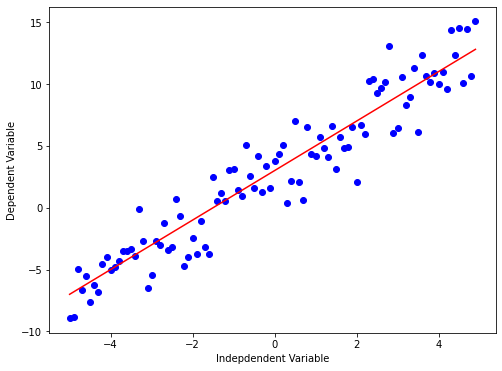

In [7]:
x = np.arange(-5.0, 5.0, 0.1)   # values are generated within the half-open interval [-5.0, 5.0) with the step 0.1

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(8,6))   # adjust the figure size
plt.plot(x, ydata,  'bo')   # 'b' for blue, 'o' for point
plt.plot(x,y, 'r')   # 'r' for solid line
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [8]:
x.size

100

In [9]:
len(x)

100

In [11]:
#y_noise
len(y_noise)

100

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$

Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$


Let's take a look at a cubic function's graph.


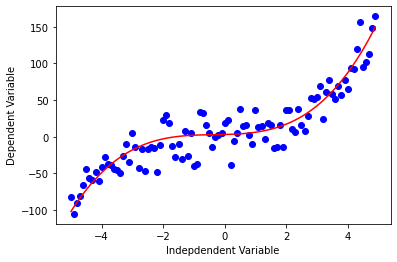

In [12]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

As you can see, this function has $x^3$ and $x^2$ as independent variables. Also, the graphic of this function is not a straight line over the 2D plane. So this is a non-linear function.


Some other types of non-linear functions are:


### Quadratic


$$ Y = X^2 $$


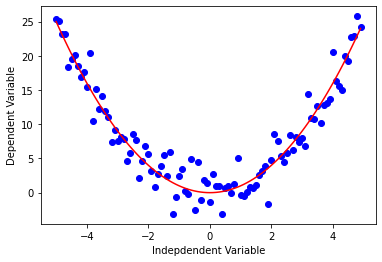

In [13]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)   # same as x**2
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 


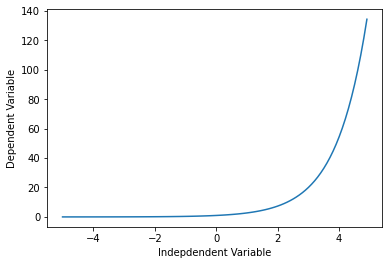

In [14]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


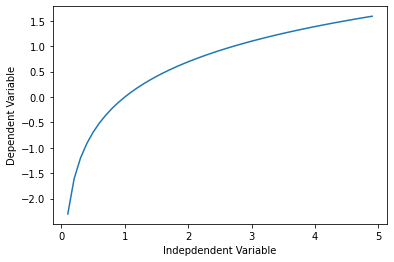

In [15]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


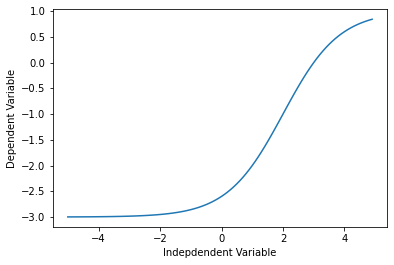

In [16]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>

# Non-Linear Regression example


For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 


In [17]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-07-11 05:23:18 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


### Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.


In [19]:
df['Year'].values

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

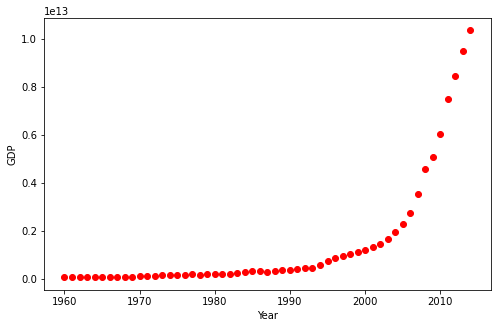

In [24]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')   # 'r' for red, 'o' for point
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


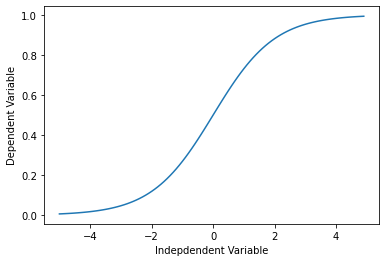

In [25]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters. 


In [26]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:


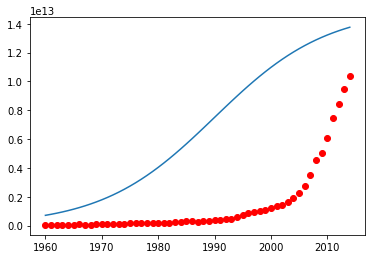

In [27]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [28]:
Y_pred

array([0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.9168273 ])

In [29]:
Y_pred*15000000000000

array([7.11388098e+11, 7.82303446e+11, 8.59862638e+11, 9.44600341e+11,
       1.03707631e+12, 1.13787270e+12, 1.24759045e+12, 1.36684442e+12,
       1.49625734e+12, 1.63645232e+12, 1.78804383e+12, 1.95162712e+12,
       2.12776597e+12, 2.31697898e+12, 2.51972422e+12, 2.73638286e+12,
       2.96724167e+12, 3.21247525e+12, 3.47212825e+12, 3.74609842e+12,
       4.03412132e+12, 4.33575746e+12, 4.65038278e+12, 4.97718342e+12,
       5.31515541e+12, 5.66311003e+12, 6.01968510e+12, 6.38336225e+12,
       6.75249004e+12, 7.12531219e+12, 7.50000000e+12, 7.87468781e+12,
       8.24750996e+12, 8.61663775e+12, 8.98031490e+12, 9.33688997e+12,
       9.68484459e+12, 1.00228166e+13, 1.03496172e+13, 1.06642425e+13,
       1.09658787e+13, 1.12539016e+13, 1.15278718e+13, 1.17875247e+13,
       1.20327583e+13, 1.22636171e+13, 1.24802758e+13, 1.26830210e+13,
       1.28722340e+13, 1.30483729e+13, 1.32119562e+13, 1.33635477e+13,
       1.35037427e+13, 1.36331556e+13, 1.37524096e+13])

Our task here is to find the best parameters for our model. Lets first normalize our x and y:


In [30]:
# Lets normalize our data, Simple feature scaling, new values in the range between 0 and 1
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [38]:
xdata

array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

In [32]:
ydata

array([0.0057156 , 0.00478589, 0.00450854, 0.00483806, 0.00570384,
       0.00673204, 0.00732793, 0.00695878, 0.0067595 , 0.00760213,
       0.00883705, 0.00951846, 0.01083164, 0.01320831, 0.01373801,
       0.01556399, 0.01464318, 0.01664431, 0.01432975, 0.01707961,
       0.01831512, 0.01877086, 0.01965745, 0.02211047, 0.02492384,
       0.02969431, 0.02885665, 0.02620514, 0.03000746, 0.03341025,
       0.03466722, 0.03683833, 0.04103727, 0.04276985, 0.0542994 ,
       0.07069473, 0.08313453, 0.09253259, 0.09901435, 0.10521147,
       0.11639597, 0.12865827, 0.1411811 , 0.15933902, 0.18752073,
       0.21908602, 0.26362418, 0.34023675, 0.44022261, 0.48860473,
       0.58326959, 0.7235687 , 0.81716665, 0.91653856, 1.        ])

#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.


In [33]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)   # popt argument are the best-fit paramters for beta_1 and beta_2
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.447527, beta_2 = 0.997207


In [34]:
popt

array([690.4475266 ,   0.99720712])

In [35]:
pcov

array([[ 1.52263822e+03, -2.88128654e-04],
       [-2.88128654e-04,  7.25977514e-09]])

Now we plot our resulting regression model.


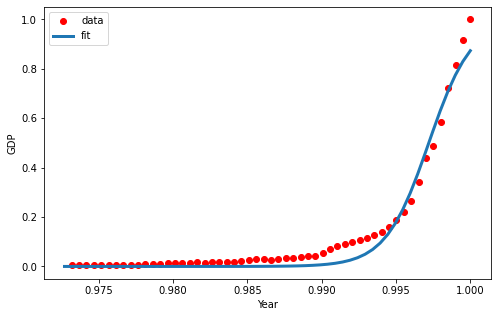

In [42]:
x = np.linspace(1960, 2015, 55)   # return evenly spaced numbers over a specified interval
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)  # for '*popt' first element will be beta_1 and second element will be beta_2
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')  # 'best' = upper left
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Practice

Can you calculate what is the accuracy of our model?


In [48]:
# write your code here

# split the data into train/test set
msk = np.random.rand(len(df)) <0.8 
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using training set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

#predict using test set
y_hat = sigmoid(test_x, *popt)

#Evaluation of the model

# Mean abosolute error
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))

# MSE
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))

# R-squared
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )  # test_y as the actual value, and the y_hat as predicted value




Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -5.34


Double-click **here** for the solution.

<!-- Your answer is below:
    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

-->


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>


| Date (YYYY-MM-DD) | Version | Changed By | Change Description    |
| ----------------- | ------- | ---------- | --------------------- |
| 2020-08-04        | 0       | Nayef      | Upload file to Gitlab |
|                   |         |            |                       |


<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>
